<a href="https://colab.research.google.com/github/priyachittamuru/KNN/blob/main/KNN_email.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Email Spam Classification Dataset CSV**
###**Source:**[Kaggle](https://www.kaggle.com/datasets/balaka18/email-spam-classification-dataset-csv)
###**Description:**
The csv file contains 5172 rows, each row for each email. There are 3002 columns. The first column indicates Email name. The name has been set with numbers and not recipients' name to protect privacy. The last column has the labels for prediction : 1 for spam, 0 for not spam. The remaining 3000 columns are the 3000 most common words in all the emails, after excluding the non-alphabetical characters/words. For each row, the count of each word(column) in that email(row) is stored in the respective cells. Thus, information regarding all 5172 emails are stored in a compact dataframe rather than as separate text files.

In [22]:
#Importing neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.model_selection import RandomizedSearchCV

In [3]:
# Load the dataset
data = pd.read_csv('/content/emails.csv')

In [4]:
#Printing the dataset
data.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [5]:
##finding the datatypes,colums and rows /information of the data provided
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.5+ MB


In [6]:
#Printing the shape(n0.of rows and colomns) of data
data.shape

(5172, 3002)

There are 5172 rows and 3002 colomns

In [7]:
#print the null values in the datase
data.isnull().sum()

,0
Email No.,0
the,0
to,0
ect,0
and,0
...,...
military,0
allowing,0
ff,0
dry,0


There are no null values in the dataset

In [8]:
#Print the duplicate values
data.duplicated().sum()

np.int64(0)

There are no duplicate values

In [9]:
#Print value counts for prediction colomn
data['Prediction'].value_counts()

,count
Prediction,
0,3672
1,1500


1. There are 3672 instances of mail prediction being not spam
2. There are 1500 instances of mail prediction being spam  

In [10]:
# Drop unnecessary identifier column
df = data.drop(columns=["Email No."])

Dropping unnecessary colomns

In [11]:
# Split features and target
X = df.drop(columns=["Prediction"])
y = df["Prediction"]

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
# Initialize KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)  # Starting with k=5

# Train the model
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

1. Using Knnclassifiers and giving the number of neighbors ,setting k = 5, which means the algorithm will look at the 5 nearest neighbors to make a prediction.
2. Fitting the Knn model to train data to model (here Knn stores the data and uses it for future predictions).
3. KNN is a lazy learner, so it doesn’t actually "learn" like other models—it just remembers the training data.

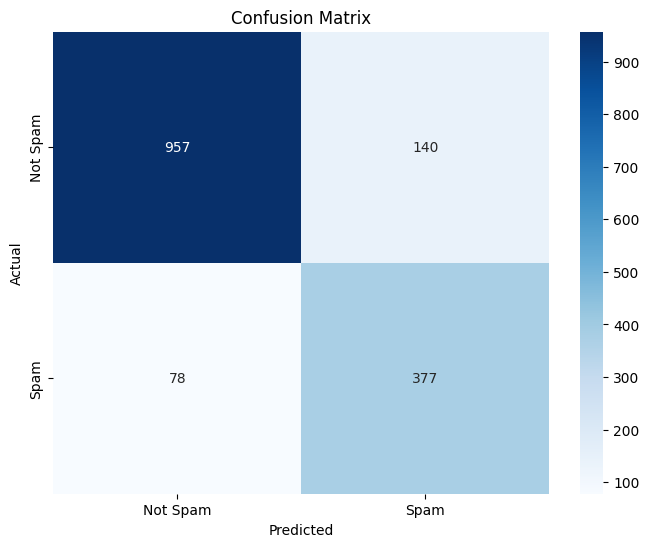

In [14]:
# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Not Spam", "Spam"], yticklabels=["Not Spam", "Spam"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


1. True Negative (TN) = 957 → Not spam correctly identified as not spam

2. False Positive (FP) = 140 → Not spam wrongly identified as spam

3. False Negative (FN) = 78 → Spam wrongly identified as not spam

4. True Positive (TP) = 377 → Spam correctly identified as spam

In [15]:
#Predictions from the model
y_train_pred= knn.predict(X_train)
y_test_pred= knn.predict(X_test)

In [16]:
#Getting the performance
print('Training Accuracy :', np.round(metrics.accuracy_score(y_train, y_train_pred),3))
print('Training Precision :', np.round(metrics.precision_score(y_train, y_train_pred),3))
print('Training Recall :' , np.round(metrics.recall_score(y_train, y_train_pred),3))
print('Training F1 Score :' , np.round(metrics.f1_score(y_train, y_train_pred),3))
print('\nTesting Accuracy :' ,  np.round(metrics.accuracy_score(y_test, y_test_pred),3))
print('Testing Precision :' , np.round(metrics.precision_score(y_test, y_test_pred),3))
print('Testing Recall :' , np.round(metrics.recall_score(y_test, y_test_pred),3))
print('Testing F1 Score :' , np.round(metrics.f1_score(y_test, y_test_pred),3))

Training Accuracy : 0.915
Training Precision : 0.819
Training Recall : 0.903
Training F1 Score : 0.859

Testing Accuracy : 0.86
Testing Precision : 0.729
Testing Recall : 0.829
Testing F1 Score : 0.776


The model has a moderate accuracy of 86% which means about 86% of emails are correctely classified and has recall of 82% which means it correctly identified 82% positive instances,so there is room for improvement

In [18]:
'''#Hyperparameter Tuning for optimal model
param_grid = {
    'n_neighbors': list(range(1, 21)),
    'metric': ['euclidean', 'manhattan']
}

grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train_scaled, y_train)

print("Best Parameters:", grid.best_params_)
print("Best Cross-Validated Accuracy:", grid.best_score_)'''

'#Hyperparameter Tuning for optimal model\nparam_grid = {\n    \'n_neighbors\': list(range(1, 21)),\n    \'metric\': [\'euclidean\', \'manhattan\']\n}\n\ngrid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring=\'accuracy\')\ngrid.fit(X_train_scaled, y_train)\n\nprint("Best Parameters:", grid.best_params_)\nprint("Best Cross-Validated Accuracy:", grid.best_score_)'

Grid search is taking a longer time since the dataset is very large

In [17]:
# Reduce dimensionality
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Randomized search on smaller grid
param_dist = {
    'n_neighbors': np.arange(3, 15),
    'weights': ['distance'],
    'metric': ['manhattan']
}

random_search = RandomizedSearchCV(
    KNeighborsClassifier(algorithm='kd_tree'),
    param_dist,
    n_iter=15,
    cv=3,
    n_jobs=-1,
    random_state=42
)
random_search.fit(X_train_pca, y_train)

print("Best params:", random_search.best_params_)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 12 is smaller than n_iter=15. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best params: {'weights': 'distance', 'n_neighbors': np.int64(14), 'metric': 'manhattan'}


1. Dimensionality Reduction (PCA)

 * Reduces 3000+ word features to a smaller set (keeping 95% variance).
 * Since KNN slows down with high dimensions. PCA speeds up distance calculations.

2. Randomized Search (RandomizedSearchCV)

 * Tests 15 random combinations of hyperparameters (instead of all possible ones).

 * Faster than exhaustive grid search while still finding good parameters.

3. Optimized KNN Parameters

 * n_neighbors: Tests values 3–14 (avoids overfitting with small k).

 * weights='distance': Closer neighbors have more influence.

 * metric='manhattan': Better than Euclidean for high-dimensional text data.

 * algorithm='kd_tree': Speeds up nearest-neighbor searches.

4. Parallelization (n_jobs=-1)

 * Uses all CPU cores to speed up cross-validation.

In [25]:
# Use the best model from the random search to make predictions
best_knn = random_search.best_estimator_

In [26]:
y_test_pred_best = best_knn.predict(X_test_pca)
y_train_pred_best = best_knn.predict(X_train_pca)

In [27]:
#Print training and testing clasification metric scores
print('Testing Accuracy :', np.round(metrics.accuracy_score(y_test, y_pred_best),3))
print('Testing Precision :', np.round(metrics.precision_score(y_test, y_pred_best),3))
print('Testing Recall :', np.round(metrics.recall_score(y_test, y_pred_best),3))
print('Testing F1 Score :', np.round(metrics.f1_score(y_test, y_pred_best),3))

print('\nTraining Accuracy :', np.round(metrics.accuracy_score(y_train, y_train_pred_best),3))
print('Training Precision :', np.round(metrics.precision_score(y_train, y_train_pred_best),3))
print('Training Recall :', np.round(metrics.recall_score(y_train, y_train_pred_best),3))
print('Training F1 Score :', np.round(metrics.f1_score(y_train, y_train_pred_best),3))

Testing Accuracy : 0.771
Testing Precision : 0.645
Testing Recall : 0.484
Testing F1 Score : 0.553

Training Accuracy : 1.0
Training Precision : 1.0
Training Recall : 1.0
Training F1 Score : 1.0


1. Based on the traning metrics the model is perfectly memorizing the training data — every prediction it makes on the training set is correct.
2. But testing metrics, especially recall and F1-score are very poor, which means the model is struggling to generalize to new/unseen data.
3. As the difference between training and testing metrics is more ,so the model is overfitting.
4. Hence KNeighboursClassifiers with 5 neighbors gives better results with accuracy of 86%

📌 What is KNN?
\
KNN is a supervised learning algorithm used for classification and regression. It predicts the label of a data point based on the majority class of its K closest neighbors in the feature space.

\
🔍 Assumptions of KNN:

 * Similar inputs have similar outputs (i.e., data points that are close together likely belong to the same class).

 * The dataset is well-scaled, as KNN is distance-based.

 * No assumptions are made about the underlying data distribution.

\
✅ Advantages:

 * Simple and easy to understand.

 * No training time – all computation happens during prediction.

 * Naturally handles multi-class problems.

 * Non-parametric – doesn’t assume any distribution.

\
⚠️ Disadvantages:

 * Computationally expensive on large datasets (slow predictions).

 * Sensitive to irrelevant features and feature scaling.

 * Struggles with imbalanced datasets.

 * Affected by curse of dimensionality  performance can degrade with many features.

\
⚙️ Hyperparameters Used & Why

| **Hyperparameter**         | **Description**                          | **Reason**                                                                 |
|----------------------------|------------------------------------------|----------------------------------------------------------------------------|
| `n_neighbors`              | Number of neighbors to consider          | Start with 5 (common default); tuned from 1–20 for optimal balance         |
| `metric`                   | Distance metric (`euclidean`, `manhattan`) | Tried both to test which fits data geometry best                          |
| `weights` (default `uniform`) | Weighting of neighbors' vote            | Defaulted to equal votes; can also try `distance` in further tuning        |

\
📈 Why These Choices?
1. Scaling is critical for KNN due to distance-based nature.

2. Cross-validation ensures the selected K generalizes well.

3. Grid search allows systematic tuning across common distance metrics.